# Road Safety Data for the UK

#### The Data
The [files](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) provide detailed road safety data about the circumstances of personal injury road accidents in GB, the types (including Make and Model) of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. The files used here span 2013 to 2017.

#### The Task
The purpose of the analysis is 
- To summarize the main characteristics of the data, and obtain interesting facts that are worth highlighting.
- Identity and quantify associations (if any) between the number of causalities (in the Accidents table) and other variables in the data set.
- Explore whether it is possible to predict accident hotspots based on the data.

#### The OSEMiN-approach

The OSEMiN Process is an acronym that rhymes with “awesome” and stands for **Obtain, Scrub, Explore, Model, and iNterpret**. It can be used as a blueprint for working on data problems using machine learning tools. Preprocessing involves scrubbing (also called cleaning) and exploring the data. Building the model, evaluating, and optimizing it make up the process of machine learning.

# Table of Contents
<a id='Table of Contents'></a>

### <a href='#1. Obtaining and Viewing the Data'>1. Obtaining and Viewing the Data</a>

### <a href='#2. Preprocessing the Data'>2. Preprocessing the Data</a>

* <a href='#2.1. Converting Datetime Columns'>2.1. Converting Datetime Columns</a>

### <a href='#3. Exploratory Data Analysis (EDA)'>3. Exploratory Data Analysis (EDA)</a>

* <a href='#3.1. Main Characteristics of Accidents'>3.1. Main Characteristics of Accidents</a>
* <a href='#3.2. Main Characteristics of Casualties'>3.2. Main Characteristics of Casualties</a>
* <a href='#3.3. Main Characteristics of Vehicles'>3.3. Main Characteristics of Vehicles</a>

### <a href='#4. Modeling the Data'>4. Modeling the Data</a>

* <a href='#4.1. Recoding Categorical Features'>4.1. Recoding Categorical Features</a>
* <a href='#4.2. Training a Logistic Regression'>4.2. Training a Logistic Regression</a>

### <a href='#5. Interpreting the Data'>5. Interpreting the Data</a>

### 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data'></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

**Accidents Table**

*To get some ideas on how to elegantly read in multiple files in pandas, check this [link](https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688).*

In [2]:
df1 = pd.concat([pd.read_csv(f, compression='zip', low_memory=False) for f in glob.glob('data/*Accidents*.zip')])
print(df1.shape)
df1.head()

(691641, 32)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [45]:
#df1.info()

The combined accidents table that now spans 5 years contains almost 692.000 records and 32 columns, with only very few missing values. If we decided to work with date and/or time, we are likely to convert the string values into datetime format. Besides that, almost all data is properly stored as numeric data.

**Casualties Table**

In [4]:
# renaming the index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip', index=False)

In [5]:
df2 = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Casualties*.zip')], sort=True)
print(df2.shape)
df2.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


(916713, 16)


,Accident_Index,Age_Band_of_Casualty,Age_of_Casualty,Bus_or_Coach_Passenger,Car_Passenger,Casualty_Class,Casualty_Home_Area_Type,Casualty_IMD_Decile,Casualty_Reference,Casualty_Severity,Casualty_Type,Pedestrian_Location,Pedestrian_Movement,Pedestrian_Road_Maintenance_Worker,Sex_of_Casualty,Vehicle_Reference
0,201301BS70003,7,NaN,0,0,1,1,NaN,1,2,1,0,0,0,1,2
1,201301BS70005,6,NaN,0,0,1,1,NaN,1,3,3,0,0,0,2,1
2,201301BS70005,4,NaN,0,0,3,1,NaN,2,3,0,1,1,2,2,1
3,201301BS70006,10,NaN,4,0,2,1,NaN,1,3,11,0,0,0,1,1
4,201301BS70007,7,NaN,0,0,1,1,NaN,1,3,3,0,0,0,1,1


In [46]:
#df2.info()

The casualties table has almost 171,000 with 16 columns providing detailed information about the casualties. The data is almost complete with no missing values, only the age of casualty has significant NaN's, likely due to the fact that it is collected only recently. Apart from the index, all data is stored in a numeric format.

**Vehicles Table**

In [7]:
# renaming the index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip', index=False)

In [8]:
df3 = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Vehicles*.zip')], sort=True)
print(df3.shape)
df3.head()

(1270711, 23)


,1st_Point_of_Impact,Accident_Index,Age_Band_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_(CC),Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_IMD_Decile,Vehicle_Leaving_Carriageway,Vehicle_Location-Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?
0,1,201301BS70003,8,NaN,10,1,8,2402,0,0,...,1,0,0,NaN,0,0,6,1,8,1
1,1,201301BS70003,7,NaN,-1,1,8,-1,0,0,...,1,0,0,NaN,0,0,18,2,1,1
2,1,201301BS70005,6,NaN,5,1,4,124,0,0,...,2,0,0,NaN,0,0,18,1,3,1
3,0,201301BS70006,8,NaN,-1,1,1,-1,0,0,...,1,0,0,NaN,0,0,14,1,11,1
4,4,201301BS70007,7,NaN,7,1,4,124,0,0,...,1,0,0,NaN,0,0,4,1,3,1


In [47]:
#df3.info()

The vehicles table is the largest of all three and contains roughly 239.000 records with 23 columns with detailed information about the vehicle and its driver. We face no missing values.

*Back to: <a href='#Table of contents'> Table of contents</a>*
### 2. Preprocessing the Data
<a id='2. Preprocessing the Data'></a>

#### 2.1. Converting Datetime Columns
<a id='2.1. Converting Datetime Columns'></a>

In [10]:
df1['Date']= pd.to_datetime(df1['Date'], format="%d/%m/%Y")

*Back to: <a href='#Table of contents'> Table of contents</a>*
### 3. Exploratory Data Analysis (EDA)
<a id='3. Exploratory Data Analysis (EDA)'></a>

#### 3.1. Main Characteristics of Accidents 
<a id='3.1. Main Characteristics of Accidents'></a>

In [48]:
#df1.describe().T

In [39]:
df_sub = pd.DataFrame(df1.groupby('Day_of_Week')['Accident_Severity'].value_counts())
df_sub.columns = ['Count']
df_sub.reset_index(inplace=True)
#df_sub

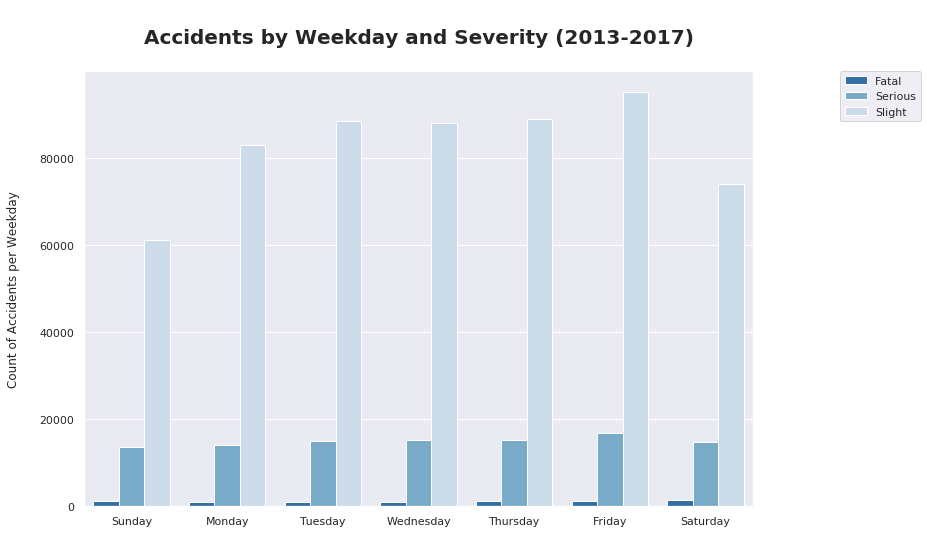

In [106]:
# plot grouped dataframe with seaborn
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y='Count', x='Day_of_Week', hue='Accident_Severity', hue_order=[1,2,3],
            data=df_sub, palette="Blues_r")

# add title and axis label
ax.set_title('\nAccidents by Weekday and Severity (2013-2017)\n', fontsize=20, fontweight='bold')
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax.set_xticklabels(labels)
ax.set(xlabel='', ylabel='Count of Accidents per Weekday\n')

# rename legend labels & put legend outside plot
handles, labels = ax.get_legend_handles_labels()
ax.legend((handles), ('Fatal', 'Serious', 'Slight'), bbox_to_anchor=(1.25, 1), borderaxespad=0.);

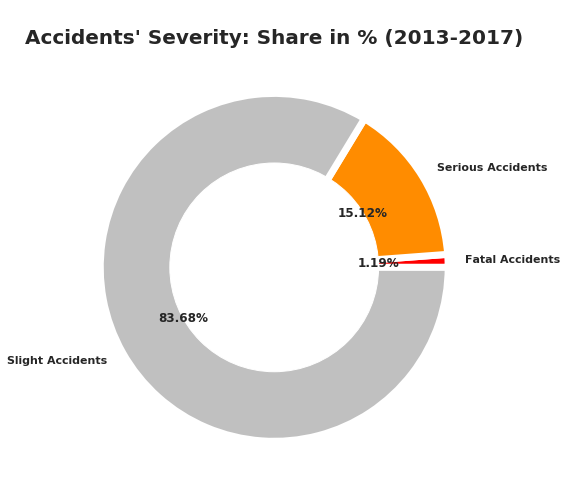

In [108]:
# assign the data
fatal   = df1.Accident_Severity.value_counts()[1]
serious = df1.Accident_Severity.value_counts()[2]
slight  = df1.Accident_Severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccidents\' Severity: Share in % (2013-2017)', fontsize=20, fontweight='bold')
plt.show()

In [65]:
# set the date as index and sort by index
df_yearly  = df1.set_index('Date').sort_index()
df_yearly.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,2013440001677,465239.0,104862.0,-1.074848,50.839552,44,3,1,1,3,...,0,0,1,1,2,0,0,2,1,E01017054
2013-01-01,201343N016013,482642.0,196479.0,-0.806602,51.660979,43,2,3,2,3,...,0,0,1,1,1,0,0,2,1,E01017842
2013-01-01,201320W005203,406160.0,289760.0,-1.910686,52.505674,20,2,2,2,3,...,0,0,1,1,1,0,0,1,1,E01009047
2013-01-01,201320W000443,403720.0,287210.0,-1.946662,52.482771,20,3,2,1,3,...,0,0,1,1,1,0,0,1,1,E01009140
2013-01-01,201331A027713,449341.0,357614.0,-1.264307,53.113418,31,3,4,2,3,...,0,0,1,1,1,0,0,2,1,E01027959


In [127]:
df_monthly = df_yearly.groupby([pd.TimeGrouper(freq='M')])['Number_of_Casualties'].mean().reset_index()

# flatten the multi-index
df_monthly.columns = ['Date', 'Average_No_of_Casualties']
df_monthly.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,Date,Average_No_of_Casualties
0,2013-01-31,1.309994
1,2013-02-28,1.309125
2,2013-03-31,1.325263
3,2013-04-30,1.327545
4,2013-05-31,1.333392


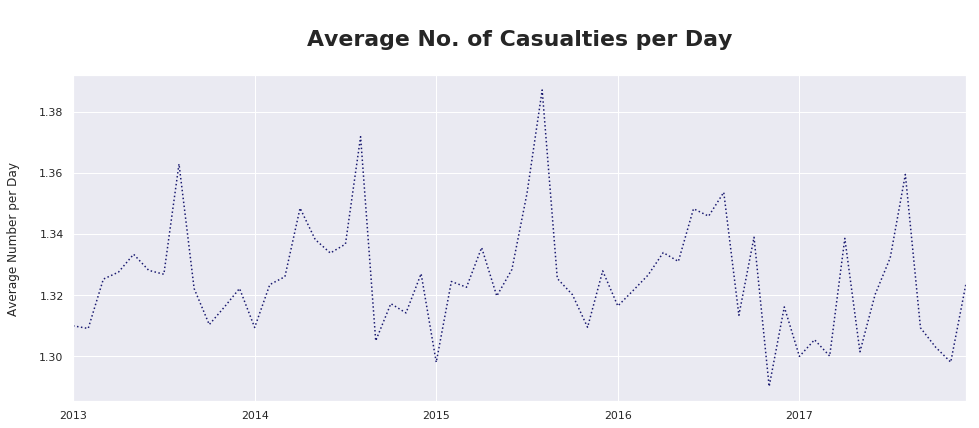

In [130]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(16, 6))

df_monthly.plot(x='Date', y='Average_No_of_Casualties', ax=ax, color='midnightblue', style=':', legend=None)
ax.set_title('\nAverage No. of Casualties per Day\n', fontsize=22, fontweight='bold')
ax.set(xlabel='', ylabel='Average Number per Day\n');

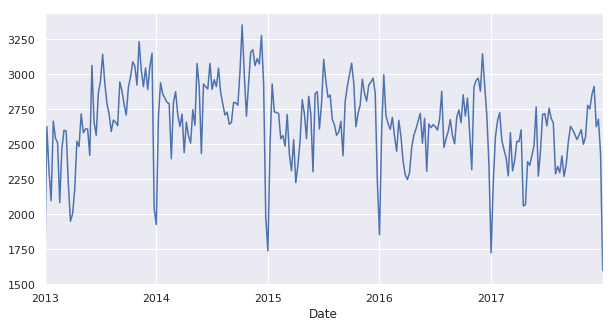

In [141]:
weekly_casualties = df1.set_index('Date').sort_index().resample('W').size()
weekly_casualties.plot(figsize=(10,5));

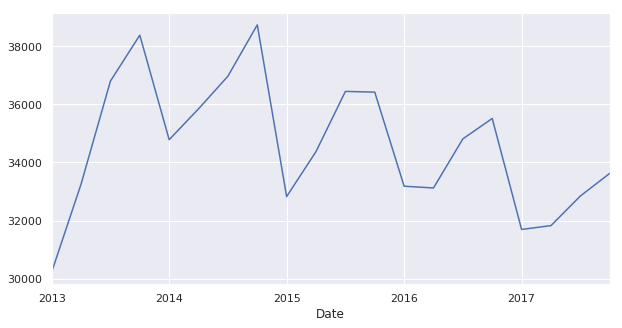

In [144]:
quaterly_casualties = df1.set_index('Date').sort_index().resample('Q').size()
quaterly_casualties.plot(figsize=(10,5));

In [145]:
wd_counts = df1['Date'].dt.weekday_name.value_counts()
wd_counts

Friday       113202
Thursday     105191
Tuesday      104590
Wednesday    104231
Monday        98168
Saturday      90206
Sunday        76053
Name: Date, dtype: int64

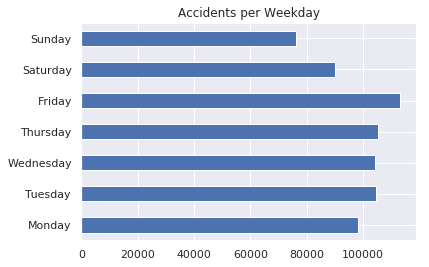

In [147]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wd_counts.reindex(days).plot(kind='barh', title='Accidents per Weekday');

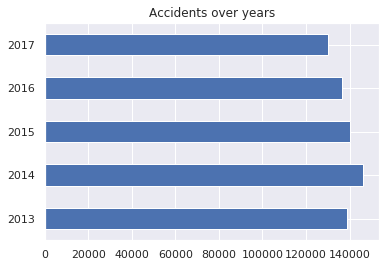

In [148]:
df1['Date'].dt.year.value_counts().sort_index().plot(kind='barh', title='Accidents over years')

In [150]:
weekday = df1['Date'].dt.weekday_name
year = df1['Date'].dt.year

accidents_wd_year = df1.groupby([year, weekday]).size()
accidents_wd_year.head(20)

Date  Date     
2013  Friday       23044
      Monday       19831
      Saturday     18027
      Sunday       14854
      Thursday     21186
      Tuesday      21257
      Wednesday    20461
2014  Friday       23960
      Monday       21093
      Saturday     19021
      Sunday       15940
      Thursday     21780
      Tuesday      22318
      Wednesday    22210
2015  Friday       22374
      Monday       20032
      Saturday     18114
      Sunday       15258
      Thursday     21479
      Tuesday      21429
dtype: int64

In [156]:
accident_table = accidents_wd_year.rename_axis(['Year', 'Weekday']).unstack('Weekday').reindex(columns=days)
accident_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2013,19831,21257,20461,21186,23044,18027,14854
2014,21093,22318,22210,21780,23960,19021,15940
2015,20032,21429,21370,21479,22374,18114,15258
2016,19276,20104,20871,20949,22579,17818,15024
2017,17936,19482,19319,19797,21245,17226,14977


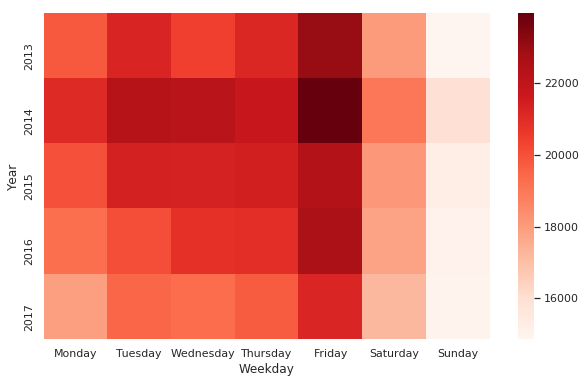

In [157]:
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds');

In [220]:
weather_table = df1.set_index('Date').sort_index()\
                                     .groupby(['Weather_Conditions', pd.Grouper(freq='Y')])\
                                     .size()\
                                     .unstack('Weather_Conditions')
weather_table

Weather_Conditions,-1,1,2,3,4,5,6,7,8,9
Date,,,,,,,,,,
2013-12-31,NaN,112284.0,14562.0,1737.0,1891.0,2156.0,522.0,619.0,2412.0,2477.0
2014-12-31,NaN,118879.0,17665.0,227.0,1575.0,2333.0,78.0,753.0,2332.0,2480.0
2015-12-31,NaN,113949.0,15559.0,540.0,2353.0,2365.0,175.0,662.0,1986.0,2467.0
2016-12-31,13.0,112241.0,14492.0,346.0,1262.0,1386.0,79.0,745.0,2244.0,3813.0
2017-12-31,1.0,104710.0,14300.0,641.0,1241.0,1102.0,99.0,624.0,2674.0,4590.0


In [221]:
# change the index to only the year
weather_table.index = pd.to_datetime(weather_table.index, format='%Y-%m-%d').year
weather_table.columns = ['Data Missing', 'Fine no high winds', 'Raining no high winds', 'Snowing no high winds',
                        'Fine + high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist',
                        'Other', 'Unknown']
weather_table

,Data Missing,Fine no high winds,Raining no high winds,Snowing no high winds,Fine + high winds,Raining + high winds,Snowing + high winds,Fog or mist,Other,Unknown
Date,,,,,,,,,,
2013,NaN,112284.0,14562.0,1737.0,1891.0,2156.0,522.0,619.0,2412.0,2477.0
2014,NaN,118879.0,17665.0,227.0,1575.0,2333.0,78.0,753.0,2332.0,2480.0
2015,NaN,113949.0,15559.0,540.0,2353.0,2365.0,175.0,662.0,1986.0,2467.0
2016,13.0,112241.0,14492.0,346.0,1262.0,1386.0,79.0,745.0,2244.0,3813.0
2017,1.0,104710.0,14300.0,641.0,1241.0,1102.0,99.0,624.0,2674.0,4590.0


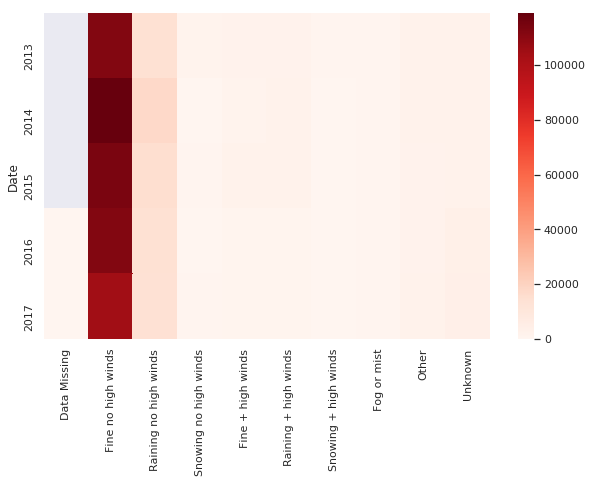

In [223]:
plt.figure(figsize=(10,6))
sns.heatmap(weather_table, cmap='Reds');

#### 3.2. Main Characteristics of Casualties 
<a id='3.2. Main Characteristics of Casualties'></a>

In [ ]:
df2.describe().T

#### 3.3. Main Characteristics of Vehicles 
<a id='3.3. Main Characteristics of Vehicles'></a>